In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

humanist_urls = ["https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/", "https://humanist.kdl.kcl.ac.uk/Archives/Current/"]
volume_dfs = []
for url in humanist_urls:
    print(f"Getting volumes from {url}")
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    links = soup.find_all('a')
    for link in links:
        if link['href'].endswith('.txt'):
            print(f"Getting volume from {url + link['href']}")
            page_soup = BeautifulSoup(requests.get(url + link['href']).text, "html.parser")
            text = page_soup.get_text()
            volume_link = url + link['href']
            dates = link['href'].split('.')[1]
            data_dict = {'volume_text': text, 'volume_link': volume_link, 'volume_dates': dates}
            volume_dfs.append(data_dict)

scraped_humanist_df = pd.DataFrame(volume_dfs)

scraped_humanist_df['volume_number'] = scraped_humanist_df['volume_dates'].str.extract(r'(\d+)')

scraped_humanist_df['volume_number'] = scraped_humanist_df['volume_number'].apply(lambda x: np.nan if len(str(x)) > 2 else x)

scraped_humanist_df['volume_number'] = scraped_humanist_df['volume_number'].fillna(pd.Series(np.arange(1, len(scraped_humanist_df) + 1)))

scraped_humanist_df[['inferred_start_year', 'inferred_end_year']] = scraped_humanist_df['volume_dates'].str.split('-', expand=True)

scraped_humanist_df.inferred_start_year = scraped_humanist_df.inferred_start_year.apply(lambda x: np.nan if len(str(x)) != 4 else x)
scraped_humanist_df.inferred_end_year = scraped_humanist_df.inferred_end_year.apply(lambda x: np.nan if len(str(x)) != 4 else x)

scraped_humanist_df.loc[scraped_humanist_df.inferred_end_year.isnull(), 'inferred_end_year'] = np.nan

start_year_before = None
end_year_before = None

for index, row in scraped_humanist_df.iterrows():
   
    if (not pd.isnull(row.inferred_start_year)) and (not pd.isnull(row.inferred_end_year)):
  
        start_year_before = row.inferred_start_year
        end_year_before = row.inferred_end_year
   
        print(start_year_before, end_year_before)

    elif (pd.isnull(row.inferred_start_year) and start_year_before is not None) and (pd.isnull(row.inferred_end_year) and end_year_before is not None):
    
        start_year_before = int(start_year_before) + 1
        end_year_before = int(end_year_before) + 1
    
        scraped_humanist_df.at[index, 'inferred_start_year'] = start_year_before
        scraped_humanist_df.at[index, 'inferred_end_year'] = end_year_before
        print(start_year_before, end_year_before)

scraped_humanist_df.to_csv("web_scraped_humanist_listserv_volumes.csv", index=False)

Getting volumes from https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/
Getting volume from https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/humanist.1987-1988.txt
Getting volume from https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/humanist.1988-1989.txt
Getting volume from https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/humanist.1989-1990.txt
Getting volume from https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/humanist.1990-1991.txt
Getting volume from https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/humanist.1991-1992.txt
Getting volume from https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/humanist.1992-1993.txt
Getting volume from https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/humanist.1993-1994.txt
Getting volume from https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/humanist.1994-1995.txt
Getting volume from https://humanist.kdl.kcl.ac.uk/Archives/Converted_Text/humanist.1995-1996.txt
Getting volume from https://humanist.kdl.

In [2]:
import pandas as pd
humanist_vols = pd.read_csv('web_scraped_humanist_listserv_volumes.csv')
humanist_vols.dtypes

volume_text            object
volume_link            object
volume_dates           object
volume_number           int64
inferred_start_year     int64
inferred_end_year       int64
dtype: object

In [3]:
humanist_vols['volume_size'] = humanist_vols['volume_text'].str.count('\n')

<AxesSubplot:xlabel='inferred_start_year'>

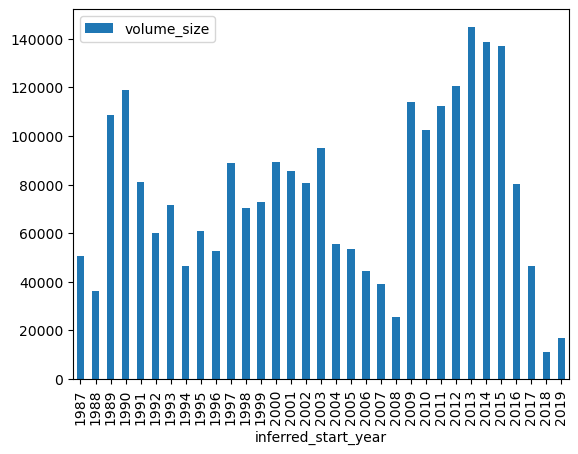

In [4]:
humanist_vols.plot(x='inferred_start_year', y='volume_size', kind='bar')

In [5]:
humanist_vols

,volume_text,volume_link,volume_dates,volume_number,inferred_start_year,inferred_end_year,volume_size
0,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...,1987-1988,1,1987,1988,50794
1,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...,1988-1989,2,1988,1989,36109
2,From: Willard McCarty \nSubject: Happy Birthda...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...,1989-1990,3,1989,1990,108695
3,From: Elaine Brennan & Allen Renear \nSubject:...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...,1990-1991,4,1990,1991,118929
4,From: Elaine Brennan & Allen Renear \nSubject:...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...,1991-1992,5,1991,1992,81193
5,From: Elaine M Brennan \nSubject: Humanist's B...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...,1992-1993,6,1992,1993,59957
6,From: 6500card%ucsbuxa@hub.ucsb.edu (Cheryl A....,https://humanist.kdl.kcl.ac.uk/Archives/Conver...,1993-1994,7,1993,1994,71763
7,From: Andrew Burday \nSubject: Re: 7.0638 Qs: ...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...,1994-1995,8,1994,1995,46569
8,"From: ""Gregory Bloomquist"" \nSubject: Round Ta...",https://humanist.kdl.kcl.ac.uk/Archives/Conver...,1995-1996,9,1995,1996,61076
9,From: Humanist \nSubject: Humanist begins its ...,https://humanist.kdl.kcl.ac.uk/Archives/Conver...,1996-1997,10,1996,1997,52506


In [6]:
humanist_vols['humanities_computing_counts'] = humanist_vols['volume_text'].str.count('humanities computing')
humanist_vols['digital_humanities_counts'] = humanist_vols['volume_text'].str.count('digital humanities')

<AxesSubplot:>

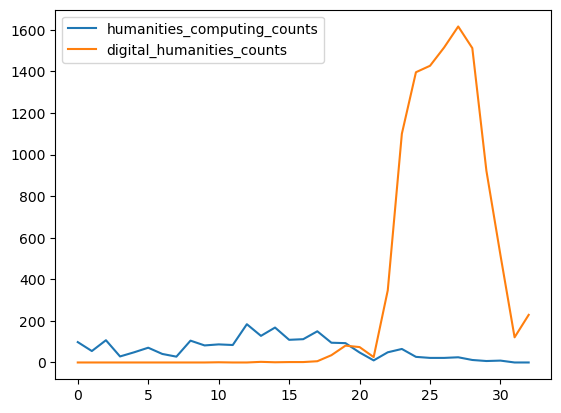

In [7]:
humanist_vols[['humanities_computing_counts', 'digital_humanities_counts']].plot()

<AxesSubplot:>

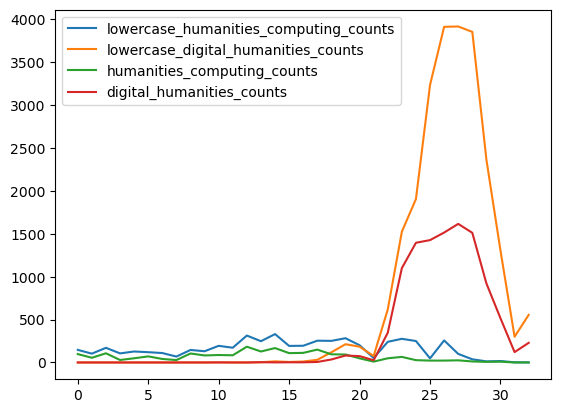

In [8]:
humanist_vols['lowercase_humanities_computing_counts'] = humanist_vols['volume_text'].str.lower().str.count('humanities computing')
humanist_vols['lowercase_digital_humanities_counts'] = humanist_vols['volume_text'].str.lower().str.count('digital humanities')

humanist_vols[['lowercase_humanities_computing_counts', 'lowercase_digital_humanities_counts', 'humanities_computing_counts', 'digital_humanities_counts']].plot()

/Users/nayakhayat/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


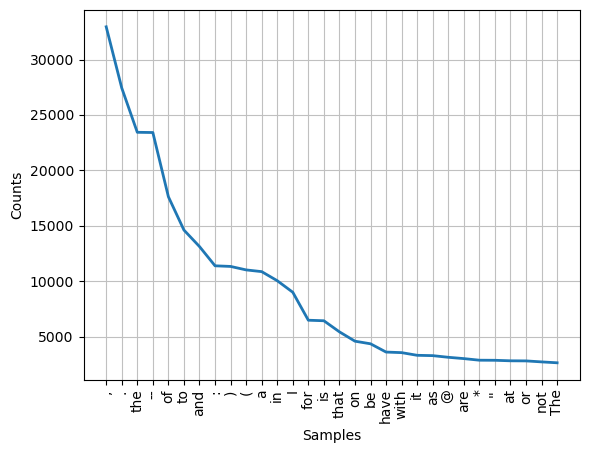

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
from nltk import word_tokenize
from nltk import FreqDist

tokens = FreqDist(sum(humanist_vols[0:2]['volume_text'].map(word_tokenize), []))
tokens.plot(30)

In [10]:
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [11]:
stemmed_column = []
for index, row, in humanist_vols.iterrows():
    stemmed_words = ''
    for token in row.volume_text.split(' '):
        stemmed_words += porter.stem(token) + ' '
    stemmed_column.append(stemmed_words)

humanist_vols['stemmed_text'] = stemmed_column

In [12]:
def stem_words(row):
    stemmed_words = ''
    for token in row.split(' '):
        stemmed_words += porter.stem(token) + ' '
    return stemmed_words
    humanist_vols['stemmed_text'] = humanist_vols.volume_text.apply(stem_words)

In [13]:
def stem_words(row):
    stemmed_words = ''
    for token in row.volume_text.split(' '):
        stemmed_words += porter.stem(token) + ' '
    return stemmed_words
humanist_vols['stemmed_text'] = humanist_vols.apply(stem_words, axis=1)

In [14]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [15]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nayakhayat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nayakhayat/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_words(row):
    words = row.split()  
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in words]  
    return ' '.join(lemmatized_words)  

row = "test the function with information"
lemmatized_row = lemmatize_words(row)
print(lemmatized_row) 

test the function with information


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = humanist_vols.volume_text.tolist()

vectorizer = TfidfVectorizer(max_df=.7, min_df=1)

In [18]:
transformed_documents = vectorizer.fit_transform(documents)

transformed_documents_as_array = transformed_documents.toarray()

dates = humanist_vols.inferred_start_year.tolist()
tfidf_results = []
for counter, doc in enumerate(transformed_documents_as_array):
    tf_idf_tuples = list(zip(vectorizer.get_feature_names_out(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df['inferred_start_year'] = dates[counter]
    tfidf_results.append(one_doc_as_df)

In [19]:
tfidf_df = pd.concat(tfidf_results)
tfidf_df = tfidf_df.sort_values(by=['score'], ascending=False)
tfidf_df.head(10)

,term,score,inferred_start_year
0,2007,0.839445,2007
0,digitalhumanities,0.821806,2013
0,digitalhumanities,0.813049,2014
0,ninch,0.802417,2002
0,ninch,0.785356,2000
0,ninch,0.765060,2001
0,2007,0.761161,2006
0,2004,0.751646,2003
0,digitalhumanities,0.748871,2016
0,2004,0.744168,2004


In [20]:
print(tfidf_df[0:200].term.unique())

['2007' 'digitalhumanities' 'ninch' '2004' 'utorepas' 'bitnet' 's16382816'
 'onlinehome' 'joyent' 'esmtp' 'amico' '2016' '2017' '1007' '2015'
 'gopher' '2018' 'barracuda' 'fqs' 'doi' 'woodward' 'epas' 'xxx' 'elra'
 '2012' 'ruhc' 'outbound' 'gants' '2009' 'mccarty_at_kcl' 'messagelabs'
 '3dx' 'aaisp' '2011' 'ichim99' 'vax' 'archiver' 'arundel' 'ippe' '2010'
 '2013' 'spam' 'saddam' 'ubiquity' '5801' '005' 'ccreegan' 'helo' 'cest'
 '2014' 'aes256' 'wmccarty' 'dhhumanist' 'wikipedia' 'astra' 'tocs'
 'hforums' 'ecu' 'lemme' 'uottawa' 'fludd' '8080' 'wlm' 'prolog' '0558'
 'postfix' 'kis' 'google' 'qs' 'bounces' 'spf' 'kraft' 'hums' 'penndrls'
 'tambovtsev' '2784' 'proofpoint' 'asg' 'mimeole' 'acadvm1' 'lachance'
 'b7' 'infobits' 'riao97' 'ceth' 'brownvm' '441495' 'dhe' 'ugl' 'cdt'
 'emfw4' '7848' 'kessler' 'hasselmo']


# **Making it Count Homework**

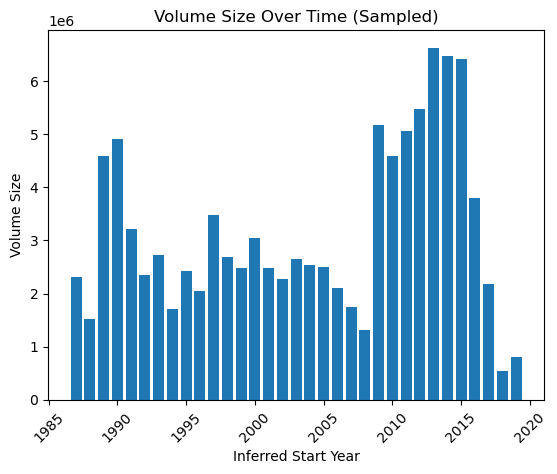

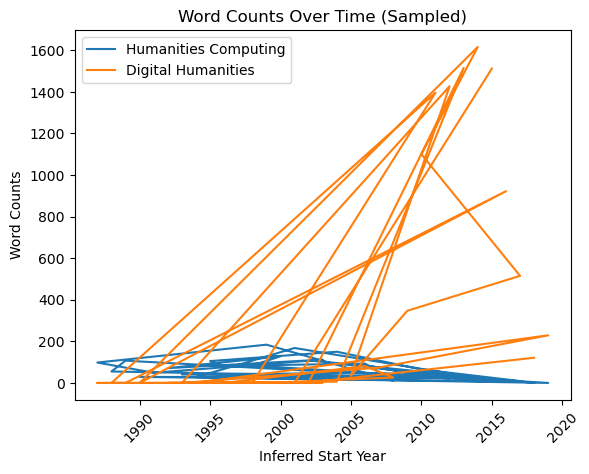

In [21]:
from matplotlib import pyplot as plt

sample_size = min(100, len(humanist_vols)) 
humanist_vols_sample = humanist_vols.sample(n=sample_size, replace=False, random_state=42)

humanist_vols_sample['volume_size'] = humanist_vols_sample['volume_text'].str.len()

plt.bar(humanist_vols_sample['inferred_start_year'], humanist_vols_sample['volume_size'])
plt.xlabel('Inferred Start Year')
plt.ylabel('Volume Size')
plt.title('Volume Size Over Time (Sampled)')
plt.xticks(rotation=45)
plt.show()

humanist_vols_sample['humanities_computing_counts'] = humanist_vols_sample['volume_text'].str.count('humanities computing')
humanist_vols_sample['digital_humanities_counts'] = humanist_vols_sample['volume_text'].str.count('digital humanities')

plt.plot(humanist_vols_sample['inferred_start_year'], humanist_vols_sample['humanities_computing_counts'], label='Humanities Computing')
plt.plot(humanist_vols_sample['inferred_start_year'], humanist_vols_sample['digital_humanities_counts'], label='Digital Humanities')
plt.xlabel('Inferred Start Year')
plt.ylabel('Word Counts')
plt.title('Word Counts Over Time (Sampled)')
plt.legend()
plt.xticks(rotation=45)
plt.show()